## Búsqueda de correlación entre variables

In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [3]:
resultado = (1794 / 10760028) * 100000
print(resultado)


16.67281906701358


## Carga de data frames

In [4]:
df_defunciones_anio = pd.read_csv('../Datos/datos_defunciones/datos_defunciones_seriet.csv', parse_dates=['FECHA'])
df_parque_anio = pd.read_csv('../Datos/datos_parquev/df_historico_transpose.csv')
df_poblacion_anio = pd.read_csv('../Datos/datos_poblacion/datos_poblacion.csv', index_col=0)

### Defunciones por años

In [5]:
df_defunciones_anio['anio'] = df_defunciones_anio['FECHA'].dt.year

In [6]:
df_defunciones_anio = df_defunciones_anio.groupby('anio')[['Defunciones']].sum().reset_index()

### Parque Vehicular por años

In [7]:
df_parque_anio = df_parque_anio[['anio', 'total']]
df_parque_anio.columns = ['anio', 'parque_vehicular']

## Población por años

### Correlación

In [8]:
# filtrar los años en común
df_defunciones = df_defunciones_anio[df_defunciones_anio['anio'].between(2007, 2023)]
df_parque_vehicular = df_parque_anio[df_parque_anio['anio'].between(2007, 2023)]
df_poblacion = df_poblacion_anio[df_poblacion_anio['anio'].between(2007, 2023)]

In [9]:
# unir los data frames en uno solo
df_correlacion = df_defunciones[['anio', 'Defunciones']].merge(
    df_parque_vehicular[['anio', 'parque_vehicular']],
    on='anio'
).merge(
    df_poblacion[['anio', 'poblacion']],
    on='anio'
)

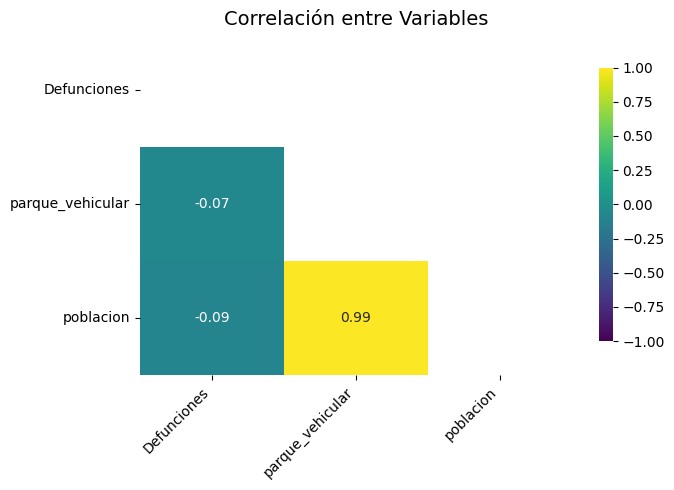

In [10]:
f.matriz_correlacion(
    dataframe=df_correlacion,
    columnas=['Defunciones', 'parque_vehicular', 'poblacion'],
    figsize=(7, 5),
    cmap='viridis',
    title='Correlación entre Variables'
)

Conclusiones

1. Correlación entre "Defunciones" y las otras variables
    - Defunciones vs parque_vehicular: Correlación de -0.07. Una correlación muy cercana a 0 y negativa, no existe relación lineal significativa entre el parque vehicular y el número de defunciones.
    - Defunciones vs población: Correlación de -0.09. Semejante al caso anterior, no representa una relación lineal significativa.
Conclusión parcial: El número de muertos producto de accidentes de tránsito, parece ser independiente del tamaño del parque vehicular y de la población en términos de correlación lineal.

2. Correlación entre "parque_vehicular" y "poblacion"
    - parque_vehicular vs población: Correlación de 0.99. Indica una correlación positiva casi perfecta, sugiere que ambas variables crecen juntas con una relación lineal muy fuerte.
Conclusión parcial: A medida que la población crece, el parque vehicular también aumenta de manera directamente proporcional.

Análisis:

    - Las defunciones no tienen una relación lineal notable con las otras dos variables, lo que puede significar que son otros factores los que influyen más en el número de defunciones. Dentro de los cuáles se pueden mencionar: calidad de las calles y carreteras, incumplimiento de las normas de tránsito, falta de medidas de protección (como uso del cinturón o cascos para los motociclistas), distracciones de los conductores, entre otras.

    - La 'poblacion' y el 'parque vehicular' están altamente correlacionados, lo que refleja una tendencia lógica: a medida que aumenta la población, también aumenta la cantidad de vehículos. Además, al pasar el tiempo pues las personas que van creciendo se pueden convertir en usuarios de vehículos propios debido a la falta de un tansporte público de calidad.

## Otras observaciones

Las tasas de crecimiento de los vehículos son considerablemente más altas que las de la población en todos los años, lo que sugiere que el parque vehicular está creciendo más rápido que la población.
Por ejemplo: para el el 2021 hubo un crecimiento del parque vehicular del 6.40 %, la población solo creció un 1.05 %. Esto considerando que el año anterior fue pandemia y que la economía mundial se vio afectada, sorprende ver cómo pasamos de un 4.48% de crecimiento del parque vehicular a uno mayor en tan poco tiempo. Esto puede explicarse con una gran accesibilidad a vehículos, a la vez de que la sociedad dominicana es muy dependiente del transporte privado. En la mayoría de los años, la tasa de crecimiento de los vehículos es entre 4 y 7 veces mayor que la de la población.


En relación a vehículos per cápita, se puede ver un notable aumento que a la vez se ve favorecido por el alza de la tasa de crecimiento del parque vehicular junto a una ralentización de la tasa de crecimiento poblacional. De manera que para 2010, la cantidad de vehículos por cada 1000 personas no llegaba a superar las 300 unidades de vehículos. Sin embargo, para el 2023 se puede decir que hay 1 vehículo por cada 2 personas. 

Este número se ve confirmado al calcular los habitantes por vehículos, y hacer la misma relación que la anterior. Para el 2010, se podría decir que habían 4 personas (3.59) por cada vehículo mientras que para el año 2023 este número se reduce a 1.95 habitantes por vehículo.

Esto podría indicar:
- Mayor dependencia de vehículos privados: Las personas compran más vehículos por familia o por cápita.
- Crecimiento económico: Un aumento en el acceso a vehículos puede reflejar mejoras en los ingresos de las familias.
- Problemas de infraestructura: El rápido crecimiento vehicular puede generar presión sobre la infraestructura vial, aumentando problemas como la congestión y contaminación.

Si esta tendencia continúa, como parece seguir su rumbo, podría implicar un aumento significativo en el número de vehículos por habitante, lo que plantea desafíos para el transporte público, el tráfico y la contaminación en ciudades con alta concentración vehicular.

In [11]:
df_correlacion['vehiculos_per_capita'] = (df_correlacion['parque_vehicular'] / df_correlacion['poblacion']) * 1000 # numero de vehículos por cada 1000 habitantes

In [12]:
df_correlacion['habitantes_por_vehiculo'] = df_correlacion['poblacion'] / df_correlacion['parque_vehicular'] # cuantas personas dependen de un vehículo
df_correlacion['tasa_crecimiento_vehiculos'] = df_correlacion['parque_vehicular'].pct_change() * 100
df_correlacion['tasa_crecimiento_poblacion'] = df_correlacion['poblacion'].pct_change() * 100
df_correlacion[['anio', 'parque_vehicular', 'poblacion', 'tasa_crecimiento_vehiculos', 'tasa_crecimiento_poblacion']]

,anio,parque_vehicular,poblacion,tasa_crecimiento_vehiculos,tasa_crecimiento_poblacion
0,2007,2234307,9455658,NaN,NaN
1,2008,2429562,9573130,8.74,1.24
2,2009,2570220,9695265,5.79,1.28
3,2010,2734740,9820175,6.40,1.29
4,2011,2917573,9945621,6.69,1.28
5,2012,3052686,10070411,4.63,1.25
6,2013,3215773,10193833,5.34,1.23
7,2014,3398662,10315528,5.69,1.19
8,2015,3612964,10434829,6.31,1.16
9,2016,3854038,10551430,6.67,1.12


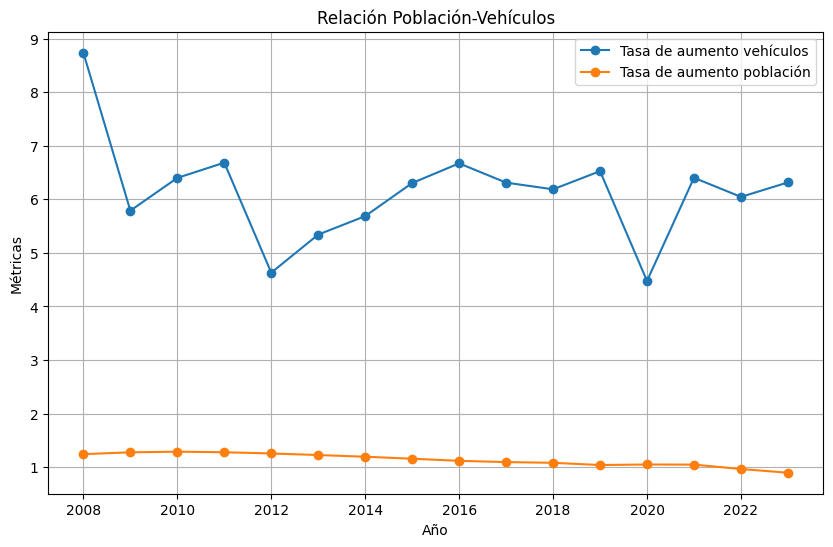

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df_correlacion['anio'], df_correlacion['tasa_crecimiento_vehiculos'], label='Tasa de aumento vehículos', marker='o')
plt.plot(df_correlacion['anio'], df_correlacion['tasa_crecimiento_poblacion'], label='Tasa de aumento población', marker='o')
plt.xlabel('Año')
plt.ylabel('Métricas')
plt.title('Relación Población-Vehículos')
plt.legend()
plt.grid()
plt.show()

    - Queda claro el comporamiento distinto de ambas, donde los vehículos per cápita muestra un crecimiento secuencial mientras que los habitantes por vehículos van siguiendo su decaída en el tiempo

In [14]:
df_correlacion['mortalidad_por_poblacion_100000'] = (df_correlacion['Defunciones'] / df_correlacion['poblacion']) * 100000
df_correlacion['mortalidad_por_vehiculos_100000'] = (df_correlacion['Defunciones'] / df_correlacion['parque_vehicular']) * 100000

La mortalidad por población (defunciones por cada 1,000 habitantes) se mantiene bastante estable a lo largo de los años, fluctuando en un rango bajo entre 18 y 22.
Esto indica que, aunque la población crece, el número de defunciones por cada 1,000 personas no aumenta de manera significativa. Eso refleja el comportamiento de las defunciones, las cuáles son se comportan de manera lineal sino que tienen altas y bajas a medida que crece la población.

En cuánto a la mortalidad por vehículos (defunciones por cada 100,000 vehículos) muestra una clara disminución con el tiempo, pasando de 78 en 2007 a 34 en 2023.
Esto significa que, aunque el parque vehicular ha crecido considerablemente, el número de defunciones relacionadas con los vehículos no ha aumentado en la misma proporción. Al mantenerse en los mismos rangos de valores a través del tiempo, y no seguir el patrón de aumento del parque vehicular, los valores de defunciones se van quedando atrás.

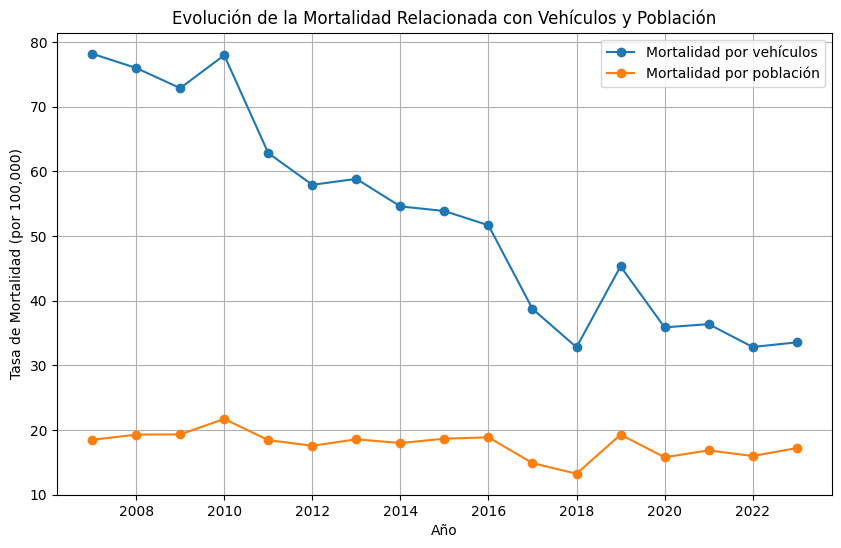

In [15]:
# Evolución de la mortalidad por vehículos y población
plt.figure(figsize=(10, 6))
plt.plot(df_correlacion['anio'], df_correlacion['mortalidad_por_vehiculos_100000'], label='Mortalidad por vehículos', marker='o')
plt.plot(df_correlacion['anio'], df_correlacion['mortalidad_por_poblacion_100000'], label='Mortalidad por población', marker='o')
plt.xlabel('Año')
plt.ylabel('Tasa de Mortalidad (por 100,000)')
plt.title('Evolución de la Mortalidad Relacionada con Vehículos y Población')
plt.legend()
plt.grid()
plt.show()

Hipótesis: hay alguna relación entre la cantidad de vehículos por las provincias más accidentadas...

In [16]:
df_correlacion.to_csv('../Datos/datos_plus/datos_alineados_variables.csv')

In [17]:
df_correlacion

,anio,Defunciones,parque_vehicular,poblacion,vehiculos_per_capita,habitantes_por_vehiculo,tasa_crecimiento_vehiculos,tasa_crecimiento_poblacion,mortalidad_por_poblacion_100000,mortalidad_por_vehiculos_100000
0,2007,1747,2234307,9455658,236.29,4.23,NaN,NaN,18.48,78.19
1,2008,1846,2429562,9573130,253.79,3.94,8.74,1.24,19.28,75.98
2,2009,1873,2570220,9695265,265.10,3.77,5.79,1.28,19.32,72.87
3,2010,2132,2734740,9820175,278.48,3.59,6.40,1.29,21.71,77.96
4,2011,1833,2917573,9945621,293.35,3.41,6.69,1.28,18.43,62.83
5,2012,1768,3052686,10070411,303.13,3.30,4.63,1.25,17.56,57.92
6,2013,1892,3215773,10193833,315.46,3.17,5.34,1.23,18.56,58.83
7,2014,1855,3398662,10315528,329.47,3.04,5.69,1.19,17.98,54.58
8,2015,1946,3612964,10434829,346.24,2.89,6.31,1.16,18.65,53.86
9,2016,1991,3854038,10551430,365.26,2.74,6.67,1.12,18.87,51.66


## Conexión año 2023: cantidad de vehículos por defunciones en provincias

In [18]:
df_descodificada = pd.read_csv('../Datos/datos_defunciones/df_descodificada.csv', index_col=0)
df_parque_provincias = pd.read_csv('../Datos/datos_parquev/df_2023.csv', index_col=0)

In [19]:
muertes_2023 = df_descodificada[df_descodificada['anio'] == 2023]

In [20]:
provincias = muertes_2023.groupby('provincia').agg(defunciones=('mes', 'count')).reset_index()

In [21]:
provincias = provincias[provincias['provincia'] != 'No declarada']
df_parque_provincias = df_parque_provincias[df_parque_provincias['provincia'] != 'Total']
provincias.reset_index(drop=True, inplace=True)
df_parque_provincias.reset_index(drop=True, inplace=True)

In [22]:
mapeo = {'Baoruco':'Bahoruco', 
         'María Trinidad. Sánchez':'María Trinidad Sánchez',
         'San Juan':'San Juan de la Maguana'}

In [23]:
f.reemplazar_valores(provincias, columna='provincia', mapeo=mapeo)

,provincia,defunciones
0,Azua,58
1,Bahoruco,27
2,Barahona,31
3,Dajabón,21
4,Distrito Nacional,93
5,Duarte,50
6,El Seibo,23
7,Elías Piña,9
8,Espaillat,59
9,Hato Mayor,17


In [24]:
# Realizo el merge para agregar la columna 'total' del df_parque_provincias al DataFrame provincias
provincias = provincias.merge(
    df_parque_provincias[['provincia', 'total']],  # Selecciono solo las columnas necesarias
    on='provincia',  
    how='left'  # 'left' para mantener todas las filas del DataFrame original
)

# Renombra la columna 'total' de df_parque_provincias a 'parque_vehicular' en el DataFrame provincias
provincias.rename(columns={'total': 'parque_vehicular'}, inplace=True)


In [25]:
provincias['defunciones'] = provincias['defunciones'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


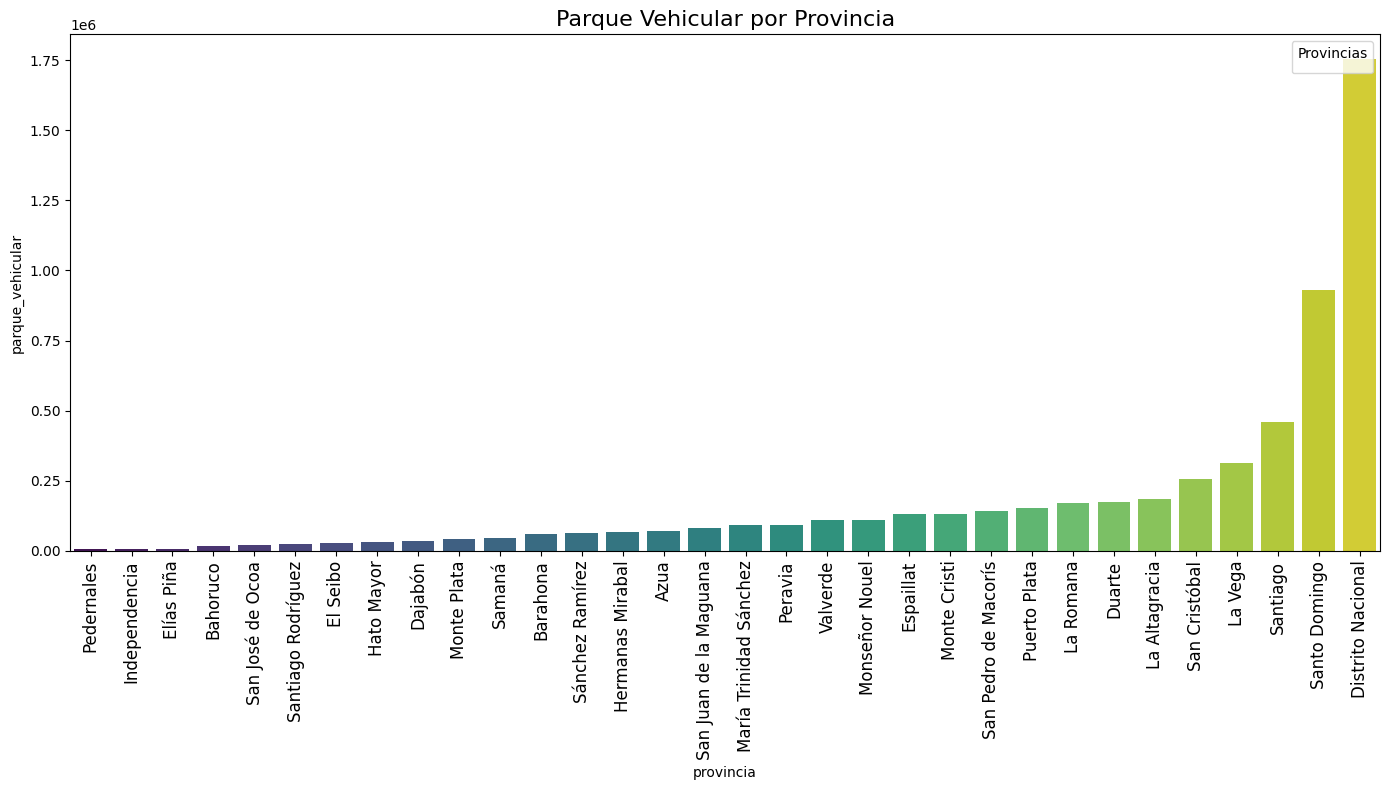

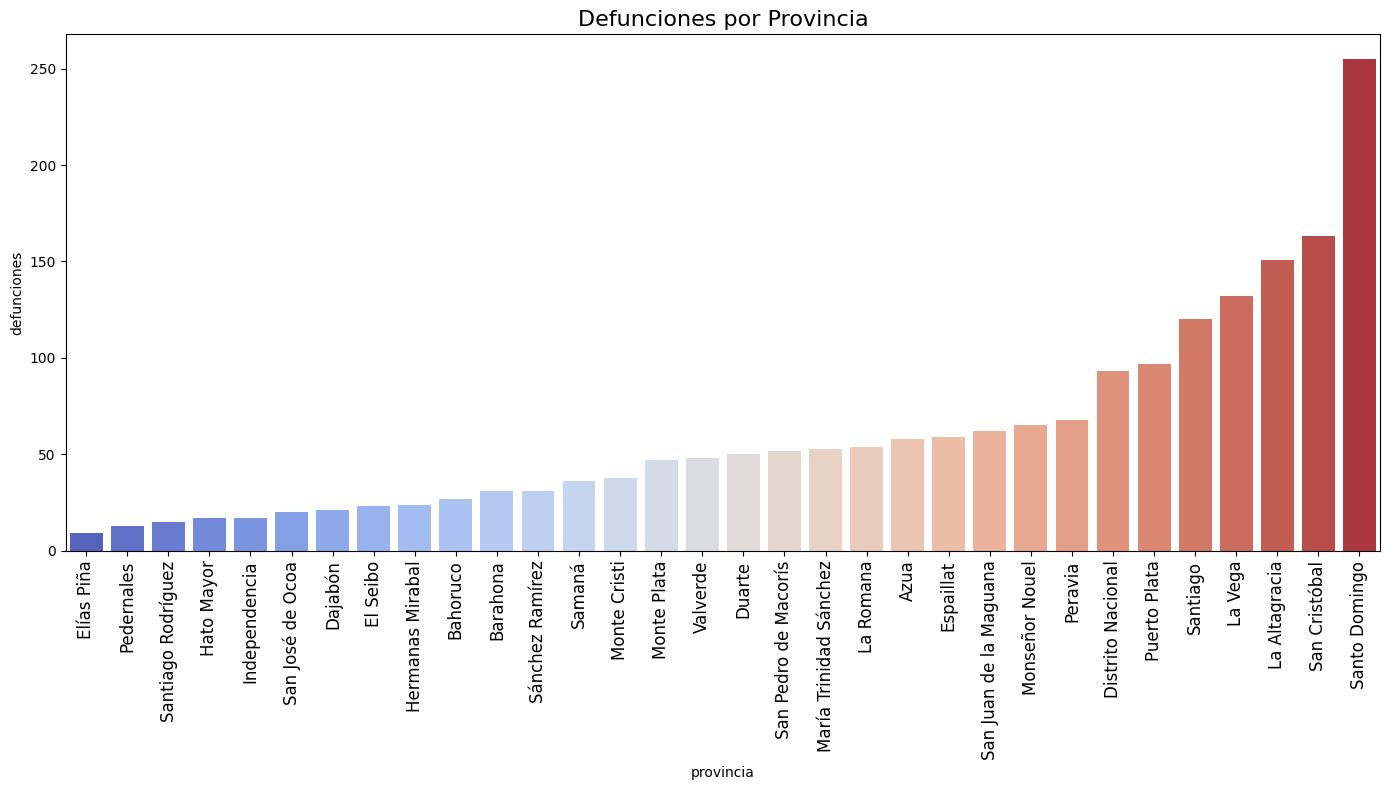

In [26]:
# Visualización para el parque vehicular con hue=provincias
plt.figure(figsize=(14, 8))
sns.barplot(
    x='provincia', 
    y='parque_vehicular', 
    data=provincias.sort_values(by='parque_vehicular'), 
    hue='provincia', 
    palette='viridis'
)

plt.title('Parque Vehicular por Provincia', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title='Provincias', fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

# Visualización separada para defunciones por provincia
plt.figure(figsize=(14, 8))
sns.barplot(
    x='provincia', 
    y='defunciones', 
    data=provincias.sort_values(by='defunciones'), 
    palette='coolwarm'
)
plt.title('Defunciones por Provincia', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
# Creo una nueva columna para la tasa
provincias['tasa_muertes_por_vehiculo'] = (provincias['defunciones'] / provincias['parque_vehicular']) * 100

# Visualizo las tasas ordenadas de mayor a menor
df_tasas = provincias[['provincia', 'tasa_muertes_por_vehiculo']].sort_values(by='tasa_muertes_por_vehiculo', ascending=False)

In [28]:
provincias.sort_values(by='tasa_muertes_por_vehiculo', ascending=False).head()

,provincia,defunciones,parque_vehicular,tasa_muertes_por_vehiculo
11,Independencia,17.00,6422.00,0.26
19,Pedernales,13.00,5559.00,0.23
1,Bahoruco,27.00,16415.00,0.16
7,Elías Piña,9.00,7358.00,0.12
18,Monte Plata,47.00,41070.00,0.11


In [29]:
provincias.sort_values(by='tasa_muertes_por_vehiculo', ascending=False).head()

,provincia,defunciones,parque_vehicular,tasa_muertes_por_vehiculo
11,Independencia,17.00,6422.00,0.26
19,Pedernales,13.00,5559.00,0.23
1,Bahoruco,27.00,16415.00,0.16
7,Elías Piña,9.00,7358.00,0.12
18,Monte Plata,47.00,41070.00,0.11


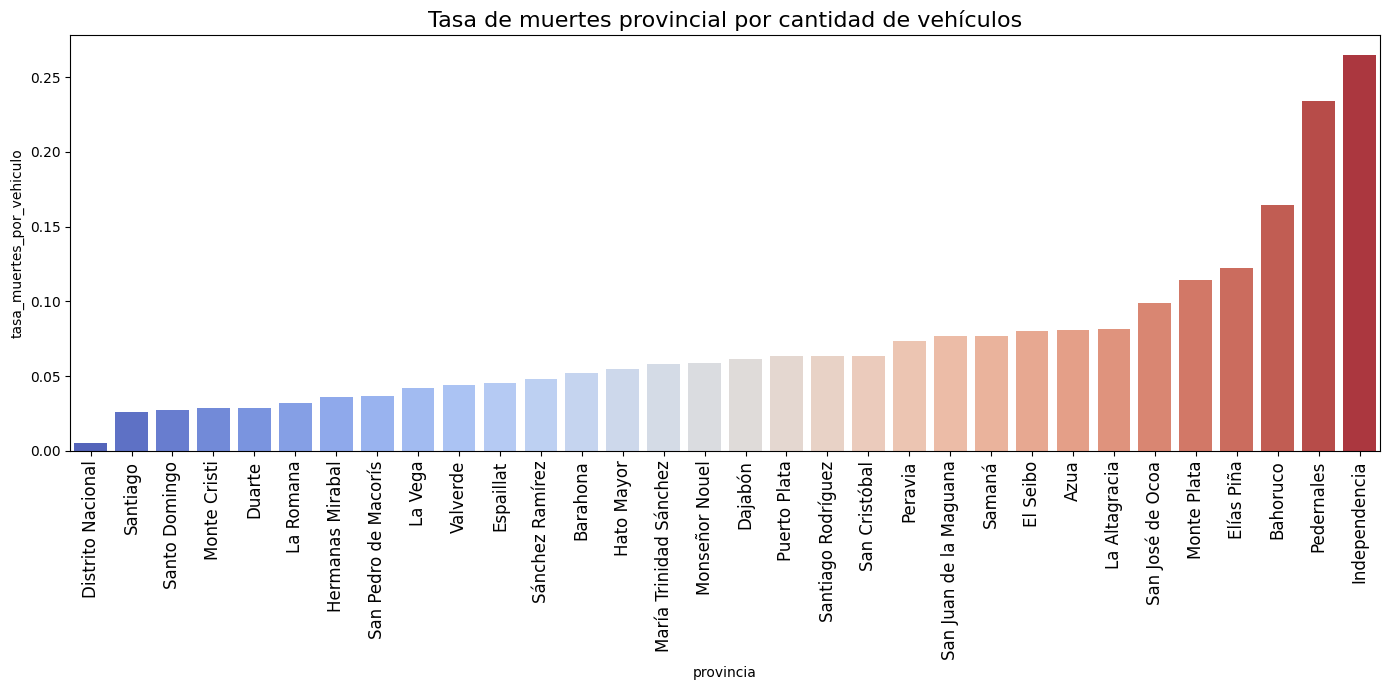

In [30]:
# Visualizo la tasa para defunciones por provincia
plt.figure(figsize=(14, 7))
sns.barplot(
    x='provincia', 
    y='tasa_muertes_por_vehiculo', 
    data=provincias.sort_values(by='tasa_muertes_por_vehiculo'), 
    palette='coolwarm'
)
plt.title('Tasa de muertes provincial por cantidad de vehículos', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

In [31]:
provincias[['provincia', 'parque_vehicular']]

,provincia,parque_vehicular
0,Azua,71954.00
1,Bahoruco,16415.00
2,Barahona,59873.00
3,Dajabón,34097.00
4,Distrito Nacional,1754508.00
5,Duarte,173916.00
6,El Seibo,28741.00
7,Elías Piña,7358.00
8,Espaillat,129747.00
9,Hato Mayor,30971.00


## Motocicletas

In [32]:
muertes_en_moto = muertes_2023[muertes_2023['medio_trans'] == 'Motocicleta, ciclomotor (passola)'] # filtro solo para motocicletas

In [33]:
muertes_en_moto.head()

,fecha,region,provincia,dia_semana,mes,anio,rango_hora,tipo_via,sexo,grupo_edad,condicion_victima,tipo_accidente,medio_trans
488,2023-01-01,Región Cibao Norte,Espaillat,Miércoles,Enero,2023,16:01-18:00,Carretera,Hombres,15-19,Conductor,Choque o colisión,"Motocicleta, ciclomotor (passola)"
489,2023-01-01,Región Cibao Norte,Espaillat,Miércoles,Enero,2023,22:01-24:00,Carretera,Hombres,35-39,Conductor,Deslizamiento,"Motocicleta, ciclomotor (passola)"
490,2023-02-01,Región Cibao Norte,Espaillat,Lunes,Febrero,2023,18:01-20:00,Carretera,Mujeres,55-59,Conductor,Choque o colisión,"Motocicleta, ciclomotor (passola)"
491,2023-03-01,Región Cibao Norte,Espaillat,Lunes,Marzo,2023,00:01-02:00,Calle,Hombres,25-29,Conductor,Deslizamiento,"Motocicleta, ciclomotor (passola)"
492,2023-03-01,Región Cibao Norte,Espaillat,Lunes,Marzo,2023,00:01-02:00,Calle,Hombres,30-34,Pasajero,Deslizamiento,"Motocicleta, ciclomotor (passola)"


In [34]:
provincias_en_moto = muertes_en_moto.groupby('provincia').agg(defunciones=('mes', 'count')).reset_index()

In [35]:
f.reemplazar_valores(provincias_en_moto, columna='provincia', mapeo=mapeo)

,provincia,defunciones
0,Azua,42
1,Bahoruco,19
2,Barahona,29
3,Dajabón,19
4,Distrito Nacional,56
5,Duarte,38
6,El Seibo,16
7,Elías Piña,4
8,Espaillat,48
9,Hato Mayor,11


In [36]:
# Realizo el merge para agregar la columna 'total' del df_parque_provincias al DataFrame provincias
provincias_en_moto = provincias_en_moto.merge(
    df_parque_provincias[['provincia', 'motocicletas']],  # Selecciona solo las columnas necesarias
    on='provincia',  
    how='left'  # 'left' para mantener todas las filas del DataFrame original
)

In [37]:
provincias_en_moto['tasa_defuncion_moto'] = (provincias_en_moto['defunciones'] / provincias_en_moto['motocicletas']) * 100 # proporción de motocicletas afectadas en accidentes mortales en moto

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


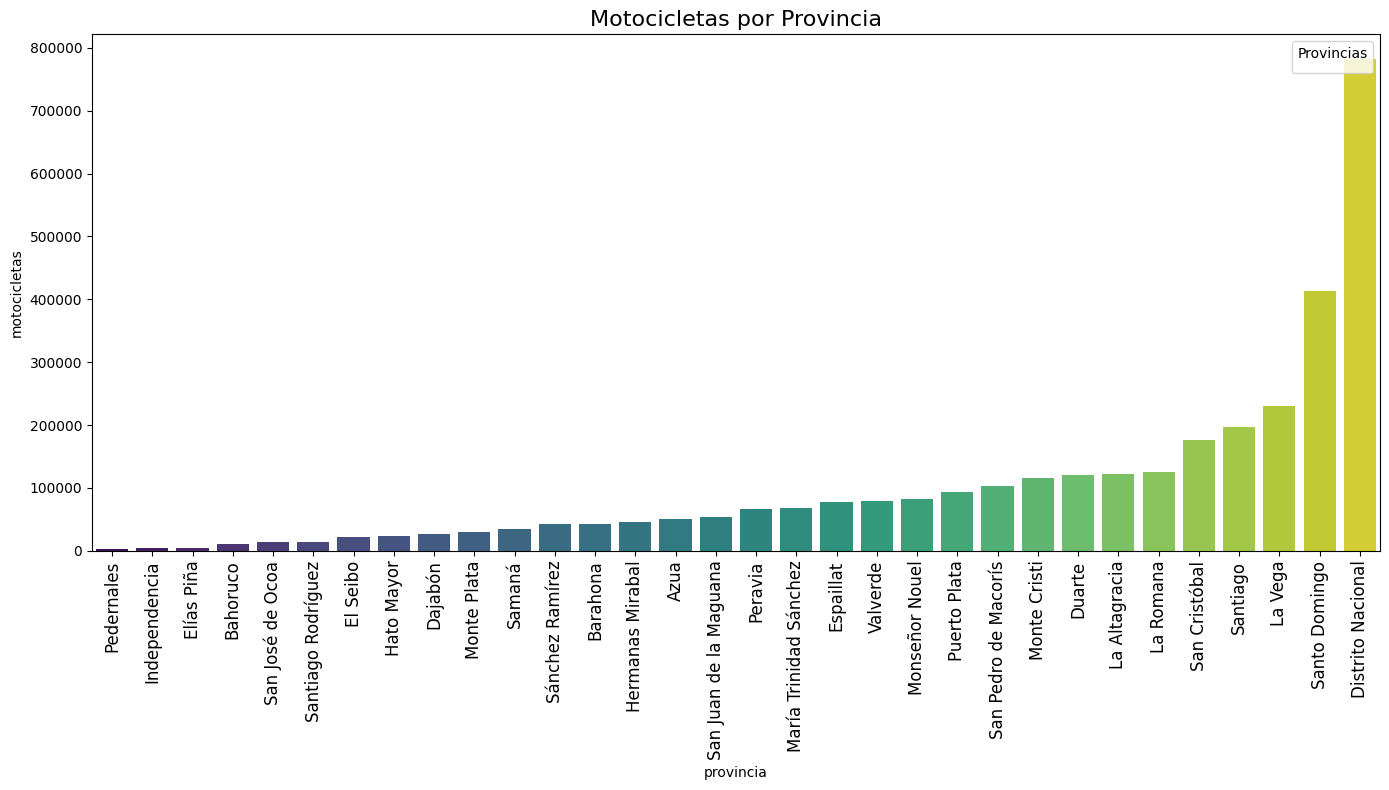

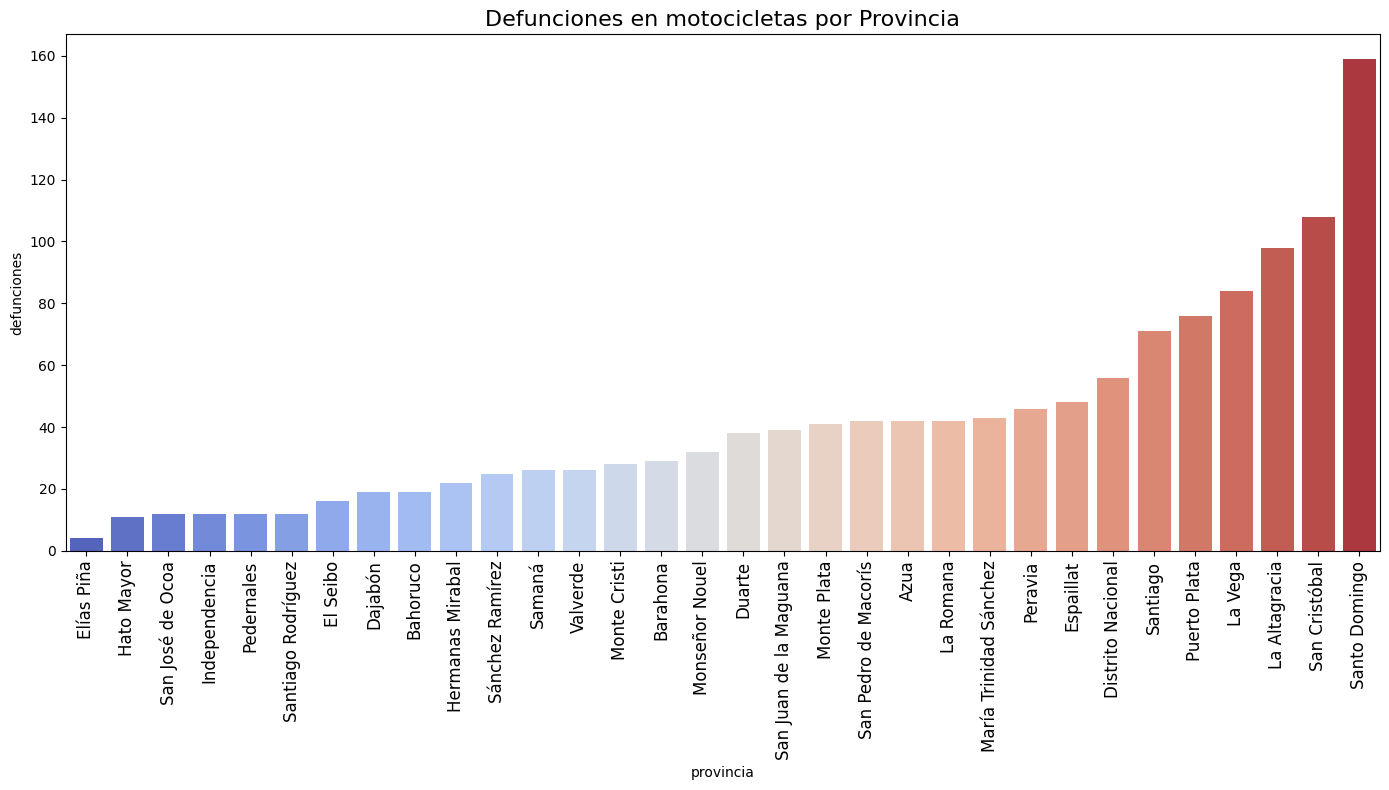

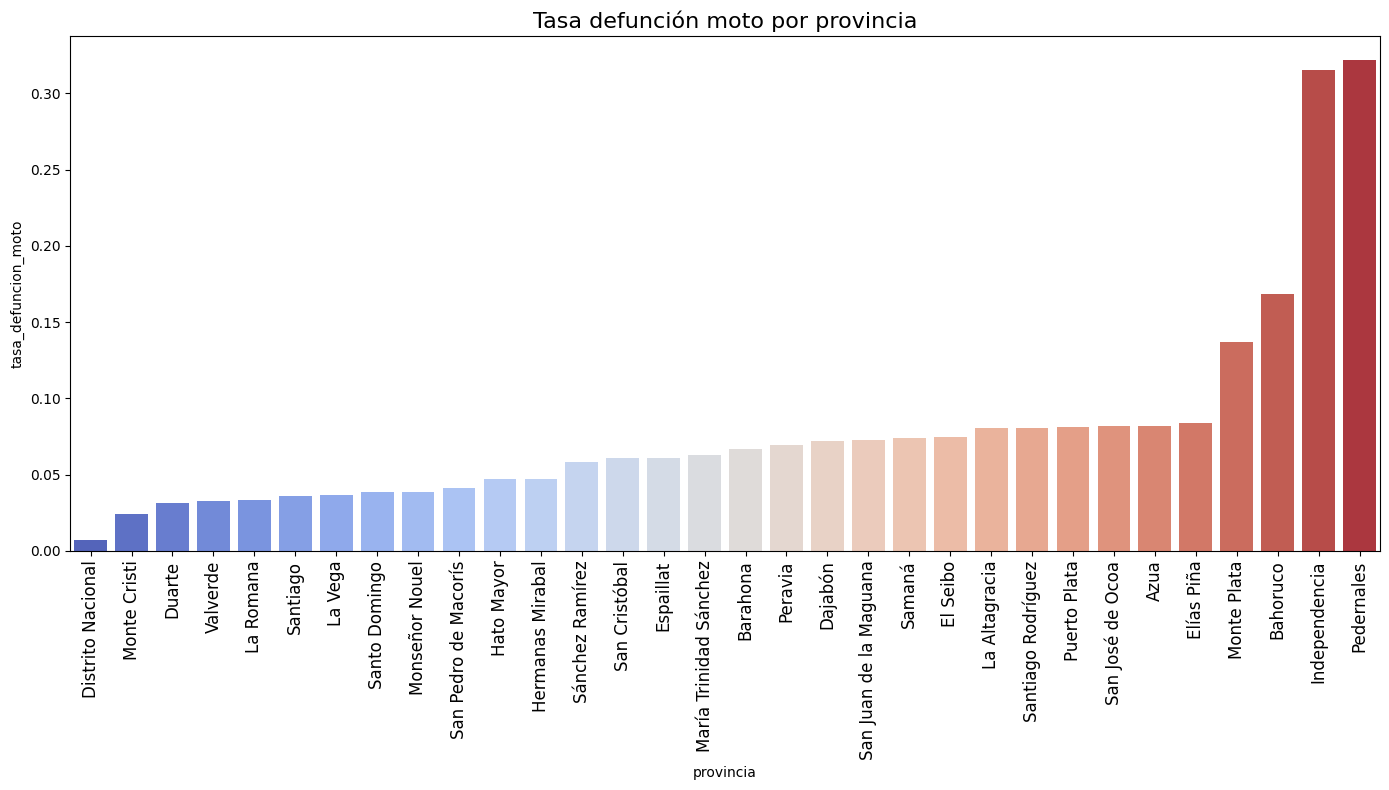

In [38]:
# Visualización para el parque vehicular con hue=provincias
plt.figure(figsize=(14, 8))
sns.barplot(
    x='provincia', 
    y='motocicletas', 
    data=provincias_en_moto.sort_values(by='motocicletas'), 
    hue='provincia', 
    palette='viridis'
)
plt.title('Motocicletas por Provincia', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title='Provincias', fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

# Visualización separada para defunciones por provincia
plt.figure(figsize=(14, 8))
sns.barplot(
    x='provincia', 
    y='defunciones', 
    data=provincias_en_moto.sort_values(by='defunciones'), 
    palette='coolwarm'
)
plt.title('Defunciones en motocicletas por Provincia', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

# Visualización separada para defunciones por provincia
plt.figure(figsize=(14, 8))
sns.barplot(
    x='provincia', 
    y='tasa_defuncion_moto', 
    data=provincias_en_moto.sort_values(by='tasa_defuncion_moto'), 
    palette='coolwarm'
)
plt.title('Tasa defunción moto por provincia', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
provincias_en_moto.sort_values(by='tasa_defuncion_moto', ascending=False)

,provincia,defunciones,motocicletas,tasa_defuncion_moto
19,Pedernales,12,3730,0.32
11,Independencia,12,3804,0.32
1,Bahoruco,19,11265,0.17
18,Monte Plata,41,29909,0.14
7,Elías Piña,4,4787,0.08
0,Azua,42,51438,0.08
24,San José de Ocoa,12,14700,0.08
21,Puerto Plata,76,93345,0.08
28,Santiago Rodríguez,12,14849,0.08
12,La Altagracia,98,121963,0.08
